In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

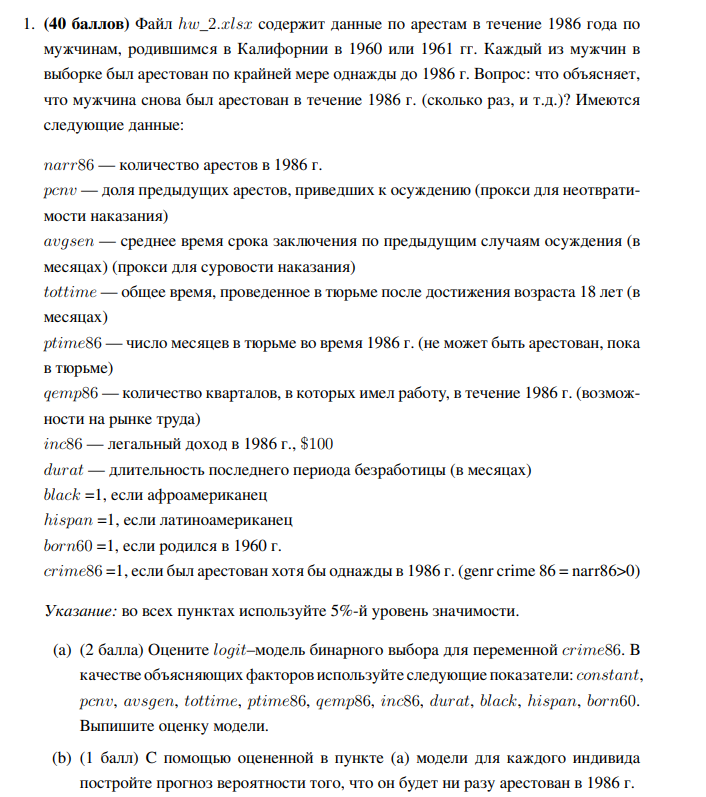

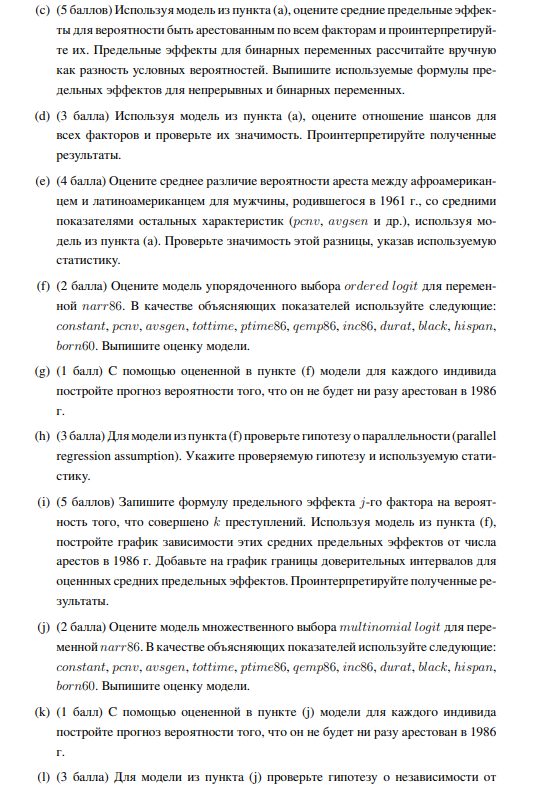

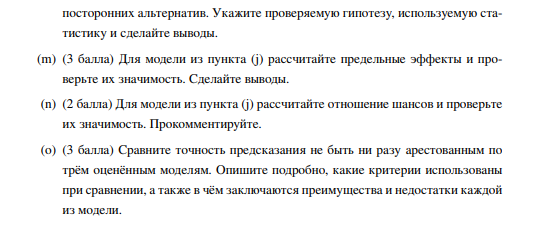

In [6]:
df = pd.read_excel('hw_2.xlsx')

In [7]:
df.head()

,avgsen,black,born60,durat,hispan,inc86,inc86sq,narr86,nfarr86,nparr86,pcnv,pcnvsq,pt86sq,ptime86,qemp86,tottime
0,0.0,0,1,4.0,0,0.0,0.00,1,0,1,1.0,1.00,0,0,0.0,0.0
1,0.0,0,1,0.0,0,103.7,10753.69,1,1,0,0.5,0.25,0,0,4.0,0.0
2,0.0,0,1,0.0,0,148.2,21963.24,0,0,0,1.0,1.00,0,0,4.0,0.0
3,0.0,0,1,3.0,0,0.0,0.00,0,0,0,1.0,1.00,0,0,0.0,0.0
4,0.0,0,1,0.0,0,183.4,33635.56,0,0,0,0.5,0.25,0,0,4.0,0.0


In [8]:
df['narr86'].value_counts()

narr86
0     1165
1      250
2       48
3       18
5        8
4        5
6        3
9        1
10       1
7        1
Name: count, dtype: int64

In [9]:
df.shape

(1500, 16)

narr86 — количество арестов в 1986 г.\
pcnv — доля предыдущих арестов, приведших к осуждению (прокси для неотвратимости наказания)\
avgsen — среднее время срока заключения по предыдущим случаям осуждения (в
месяцах) (прокси для суровости наказания)\
tottime — общее время, проведенное в тюрьме после достижения возраста 18 лет (в
месяцах)\
ptime86 — число месяцев в тюрьме во время 1986 г. (не может быть арестован, пока
в тюрьме)\
qemp86 — количество кварталов, в которых имел работу, в течение 1986 г. (возможности на рынке труда)\
inc86 — легальный доход в 1986 г., $100\
durat — длительность последнего периода безработицы (в месяцах)\
black =1, если афроамериканец\
hispan =1, если латиноамериканец\
born60 =1, если родился в 1960 г.\
crime86 =1, если был арестован хотя бы однажды в 1986 г. (genr crime 86 = narr86>0)

# a)

In [12]:
df['crime86'] = df['narr86'].apply(lambda x: 1 if x>0 else 0)

In [13]:
df['crime86'].value_counts()

crime86
0    1165
1     335
Name: count, dtype: int64

In [14]:
y = df['crime86']
X = df[['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']]

In [15]:
print(X.corr())


             pcnv    avgsen   tottime   ptime86    qemp86     inc86     durat  \
pcnv     1.000000  0.036771  0.034034  0.064523 -0.003801 -0.027444 -0.006641   
avgsen   0.036771  1.000000  0.972649  0.103841 -0.089968 -0.068801  0.028583   
tottime  0.034034  0.972649  1.000000  0.118656 -0.094947 -0.069310  0.024098   
ptime86  0.064523  0.103841  0.118656  1.000000 -0.256894 -0.156333 -0.010054   
qemp86  -0.003801 -0.089968 -0.094947 -0.256894  1.000000  0.711785 -0.496946   
inc86   -0.027444 -0.068801 -0.069310 -0.156333  0.711785  1.000000 -0.353712   
durat   -0.006641  0.028583  0.024098 -0.010054 -0.496946 -0.353712  1.000000   
black   -0.066150  0.144825  0.152175  0.070104 -0.177655 -0.157166  0.110084   
hispan   0.005324 -0.024729 -0.023207  0.052703  0.014729 -0.015025 -0.012770   
born60   0.011128 -0.047932 -0.031704  0.020555  0.012799  0.090051  0.008803   

            black    hispan    born60  
pcnv    -0.066150  0.005324  0.011128  
avgsen   0.144825 -0.024729 

In [16]:
X = X.drop(columns=['tottime']) # модель с всем набором требуемых переменных не обучалась, так как мешала мультиколлинеарность (корреляция 0.97 между avgsen и tottime)
#удаление tottime решило проблему

In [17]:
X = sm.add_constant(X)
logit_a = sm.Logit(y, X)
logit_a_fit = logit_a.fit(maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.491564
         Iterations 6


In [18]:
print(logit_a_fit.summary())

                           Logit Regression Results                           
Dep. Variable:                crime86   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1490
Method:                           MLE   Df Model:                            9
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.07443
Time:                        23:39:15   Log-Likelihood:                -737.35
converged:                       True   LL-Null:                       -796.64
Covariance Type:            nonrobust   LLR p-value:                 2.593e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8894      0.167     -5.315      0.000      -1.217      -0.561
pcnv          -0.5656      0.171     -3.314      0.001      -0.900      -0.231
avgsen        -0.0165      0.026     -0.624      0.5

# б) 

In [20]:
prob_1 = logit_a_fit.predict(X) # вероятность быть хотя бы раз арестованным
prob_0 = 1 - prob_1 # вероятность ни разу не быть арестованным

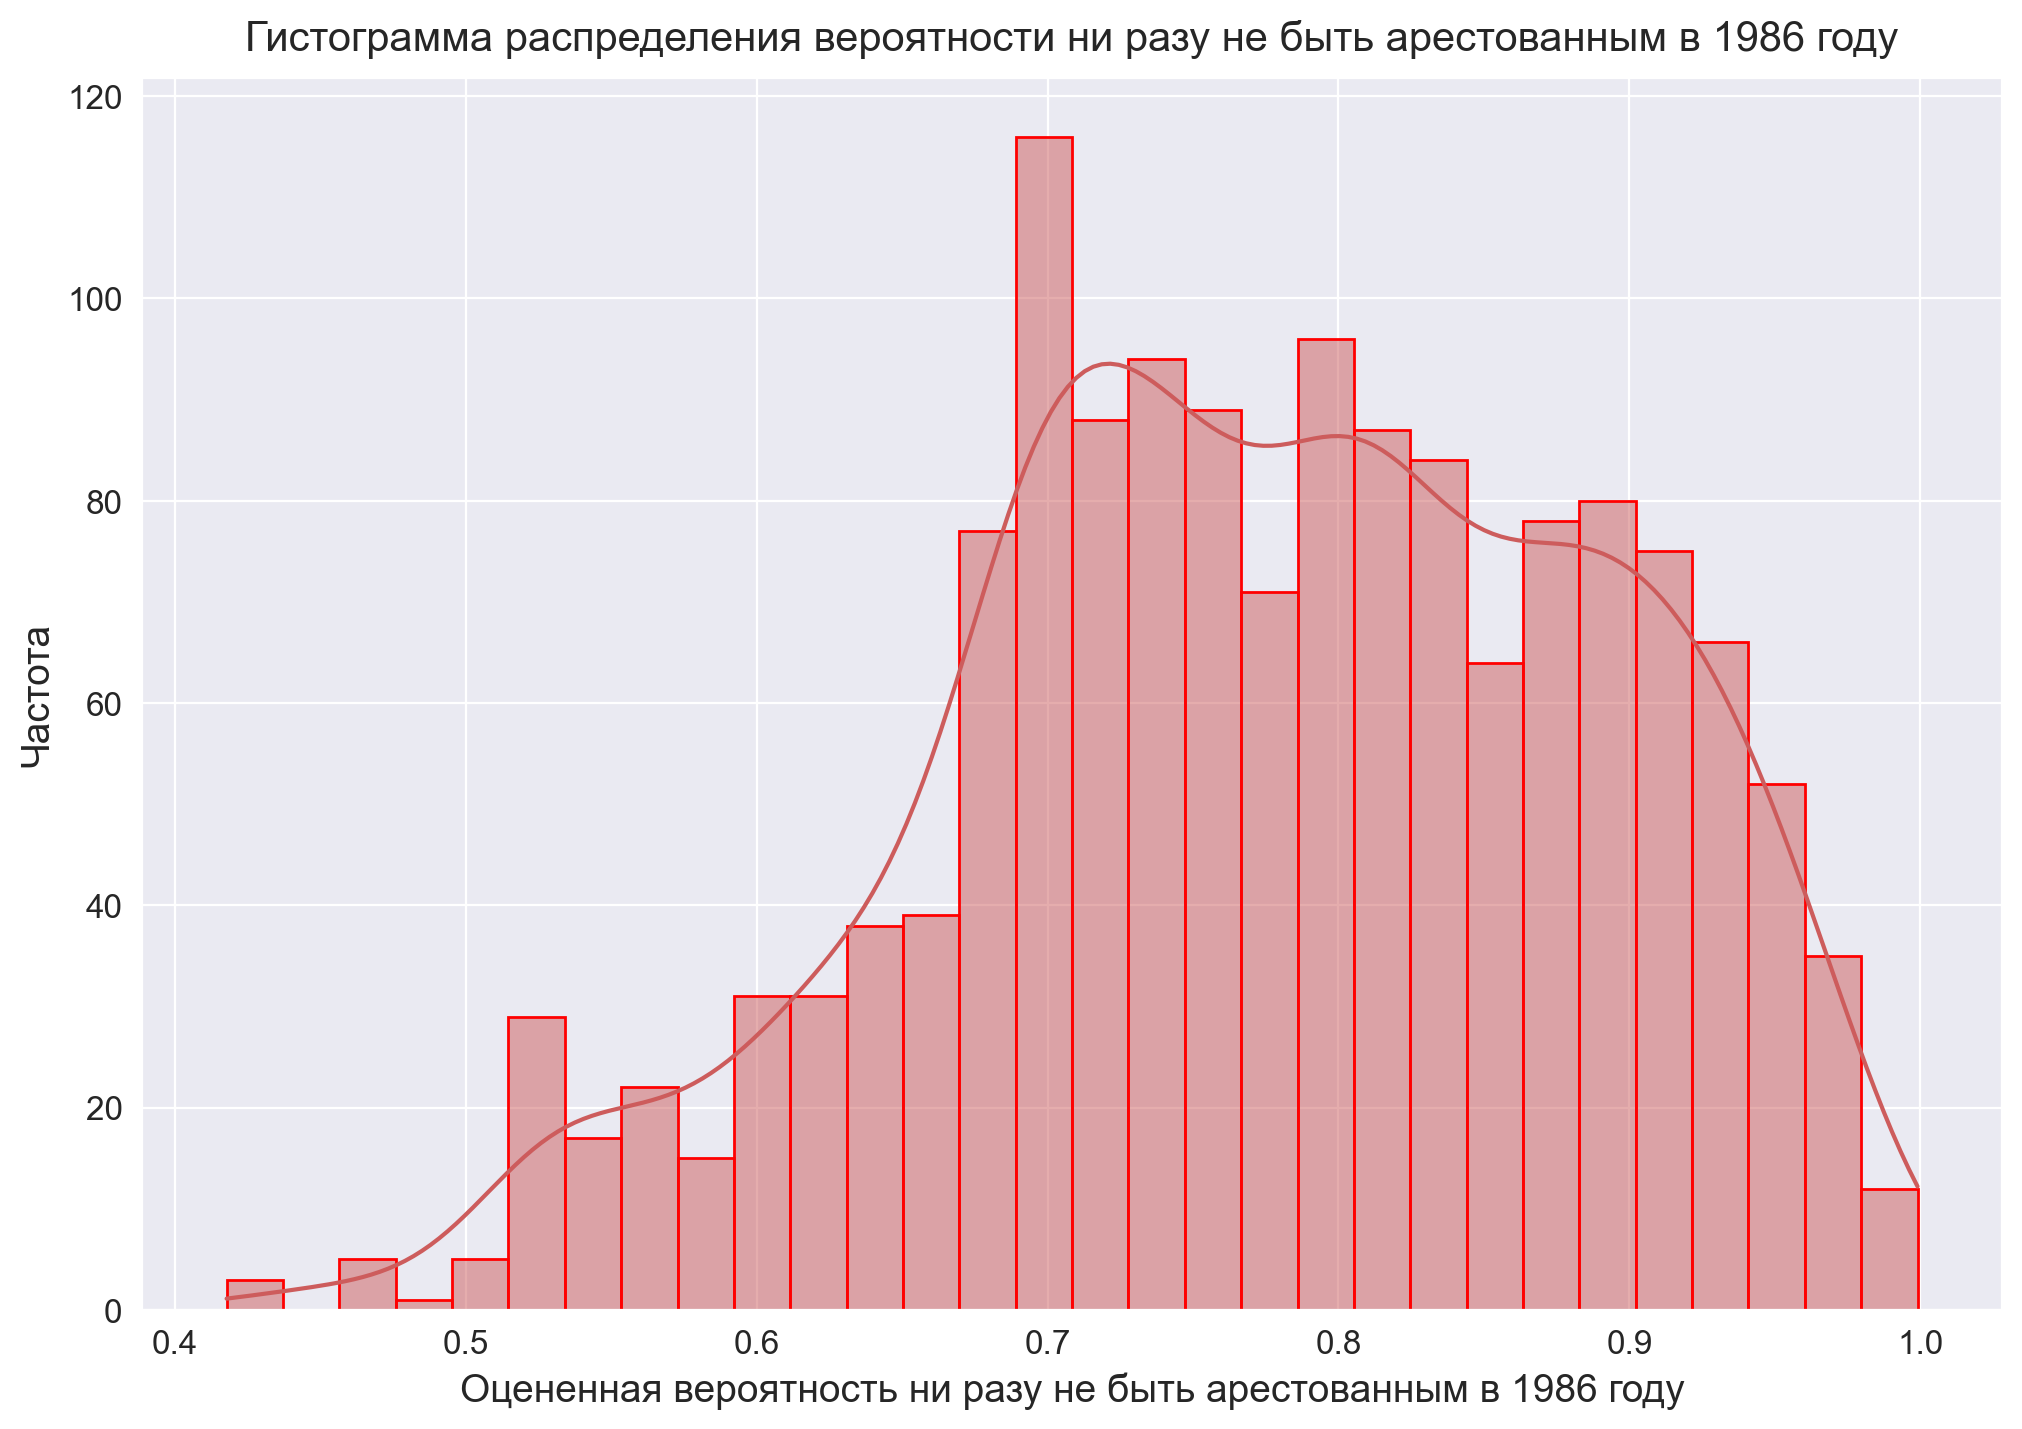

In [21]:
plt.figure(figsize=(12, 8))

sns.histplot(prob_0, bins=30, kde=True, color='indianred', edgecolor='red')

plt.xlabel('Оцененная вероятность ни разу не быть арестованным в 1986 году', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма распределения вероятности ни разу не быть арестованным в 1986 году', fontsize=15, pad=10)

plt.show()

# c)

In [23]:
margeff = logit_a_fit.get_margeff()

In [24]:
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                crime86
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pcnv          -0.0908      0.027     -3.347      0.001      -0.144      -0.038
avgsen        -0.0026      0.004     -0.624      0.533      -0.011       0.006
ptime86       -0.0129      0.007     -1.973      0.048      -0.026   -8.59e-05
qemp86         0.0110      0.010      1.054      0.292      -0.009       0.031
inc86         -0.0018      0.000     -5.815      0.000      -0.002      -0.001
durat          0.0029      0.003      1.113      0.266      -0.002       0.008
black          0.1136      0.027      4.176      0.000       0.060       0.167
hispan         0.0524      0.025      2.085      0.037       0.003       0.102
born60         0.0013      0.024      0.056      0.955      -0.046       0.048
==============================================================================
"""

## Ручной рассчет средних предельных эффектов для dummy-переменных

In [26]:
dummies = ['black', 'hispan', 'born60']
for dummy in dummies:
    X1 = X.copy()  
    X0 = X.copy()

    X1[dummy] = 1
    X0[dummy] = 0

    prob1 = logit_a_fit.predict(X1) 
    prob0 = logit_a_fit.predict(X0)
    marg_eff_dummy = prob1 - prob0
    average_marg_eff_dummy = np.mean(marg_eff_dummy)
    print(f'Средний предельный эффект для dummy-переменной {dummy} равен {round(average_marg_eff_dummy, 4)}')

Средний предельный эффект для dummy-переменной black равен 0.1273
Средний предельный эффект для dummy-переменной hispan равен 0.0545
Средний предельный эффект для dummy-переменной born60 равен 0.0013


**Предельные эффекты, рассчитанные вручную, близки к рассчитанным с помощью функции margeff, разница обусловлена погрешностью вычислений**

### Интерпретация средних предельных эффектов

**pcnv** — Увеличение доли предыдущих арестов с осуждением на 1
процентный пункт снижает вероятность нового ареста на 0.0908 процентных
пункта.

**avgsen** — Рост среднего срока заключения по прошлым осуждениям на 1
месяц уменьшает вероятность ареста на 0.0026 процентных пункта.

**ptime86** — Каждый дополнительный месяц, проведённый в тюрьме в 1986
году, снижает вероятность ареста на 0.0129 процентных пункта.

**qemp86** — Увеличение числа кварталов с работой на 1 единицу повышает
вероятность ареста на 0.0110 процентных пункта.

**inc86** — Рост легального дохода на 100 долларов уменьшает вероятность
ареста на 0.0018 процентных пункта.
**durat** — Увеличение продолжительности безработицы на 1 месяц
повышает вероятность ареста на 0.0029 процентных пункта.

**black** — Афроамериканцы имеют вероятность ареста на 0.1136 процентных
пункта выше по сравнению с белыми.

**hispan** — Латиноамериканцы имеют вероятность ареста на 0.0524
процентных пункта выше по сравнению с белыми.

**born60** — Рождение в 1960 году увеличивает вероятность ареста на 0.0013
процентных пункта.

# d)

In [31]:
odds_ratios = np.exp(logit_a_fit.params)
print(odds_ratios)

const      0.410919
pcnv       0.568020
avgsen     0.983634
ptime86    0.922826
qemp86     1.071022
inc86      0.988592
durat      1.017925
black      2.028966
hispan     1.386382
born60     1.008389
dtype: float64


## Проверка значимости

Отношение шансов незначимо, если коэффициент при факторе незначим, то есть для коэффициентов модели нужно проверить гипотезу **H0: bi = 0, H1: bi != 0 на 5% уровне значимости**. \
В таком случае гипотеза для Odds ratio **H0: OR = 1, H1: OR != 1.**

Доверительные интервалы для OR:

In [35]:
interval = logit_a_fit.conf_int()
interval_OR = np.exp(interval)
print(interval_OR)

                0         1
const    0.296021  0.570413
pcnv     0.406546  0.793628
avgsen   0.933921  1.035994
ptime86  0.851820  0.999752
qemp86   0.942751  1.216746
inc86    0.984704  0.992495
durat    0.986515  1.050335
black    1.446110  2.846742
hispan   1.018531  1.887084
born60   0.753035  1.350331


Для каждого коэффициента смотрим, **попадает ли 1 в доверительный
интервал (если попадает) – отношение шансов незначимо.**
Незначимы оказались отношения шансов для факторов: средний срок заключения
по прошлым осуждениям (avgsen), число кварталов с работой (qemp86),
продолжительности безработицы (durat), факт рождения в 1960 году (born60).
Коэффициенты при самих факторах оказались незначимы на 5% уровне в самой
модели. Это свойство отношения шансов (логично, так как exp() – монотонная
функция)

# e)

In [38]:
# 2 человека
df_e = X.iloc[:2]
df_e['born60'] = 0
df_e['black'][0] = 1
df_e['hispan'][1] = 1
df_e = df_e[['const', 'pcnv', 'avgsen', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']]
for feature in ['pcnv', 'avgsen', 'ptime86', 'qemp86', 'inc86', 'durat']:
    df_e[feature] = X[feature].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_22468\1993959848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['born60'] = 0
C:\Users\User\AppData\Local\Temp\ipykernel_22468\1993959848.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values`

In [39]:
df_e

,const,pcnv,avgsen,ptime86,qemp86,inc86,durat,black,hispan,born60
0,1.0,0.37276,0.336,0.342667,2.369733,57.0978,1.9804,1,0,0
1,1.0,0.37276,0.336,0.342667,2.369733,57.0978,1.9804,0,1,0


In [40]:
#df_e = sm.add_constant(df_e)

In [41]:
df_e

,const,pcnv,avgsen,ptime86,qemp86,inc86,durat,black,hispan,born60
0,1.0,0.37276,0.336,0.342667,2.369733,57.0978,1.9804,1,0,0
1,1.0,0.37276,0.336,0.342667,2.369733,57.0978,1.9804,0,1,0


In [42]:
prob_1_e = logit_a_fit.predict(df_e)

In [43]:
prob_1_e

0    0.292544
1    0.220305
dtype: float64

In [44]:
diff_p_e = prob_1_e[0] - prob_1_e[1]
print(f'Среднее различие вероятности ареста между афроамериканцем и латиноамериканцем для мужчины, родившегося в 1961 г., со средними показателями остальных характеристик равно {round(diff_p_e, 3)}')

Среднее различие вероятности ареста между афроамериканцем и латиноамериканцем для мужчины, родившегося в 1961 г., со средними показателями остальных характеристик равно 0.072


## Значимость разности

Я нашел метод контрастов #https://www.statsmodels.org/dev/dev/generated/statsmodels.stats.contrast.ContrastResults.html

В нем используется **Z статистика**

In [47]:
from statsmodels.stats.contrast import ContrastResults

contrast = [0] * len(logit_a_fit.params)
contrast[logit_a_fit.params.index.get_loc('black')] = 1
contrast[logit_a_fit.params.index.get_loc('hispan')] = -1

contrast = np.array(contrast)
diff = contrast @ logit_a_fit.params
var_diff = contrast @ logit_a_fit.cov_params() @ contrast.T
se_diff = np.sqrt(var_diff)

z_stat = diff / se_diff
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"Разность: {diff:.4f}")
print(f"SE: {se_diff:.4f}")
print(f"Z: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Разность: 0.3808
SE: 0.1990
Z: 1.9139
P-value: 0.0556


**На уровне значимости 10% разница статистически значима**

# f)

In [50]:
df['narr86'].value_counts()

narr86
0     1165
1      250
2       48
3       18
5        8
4        5
6        3
9        1
10       1
7        1
Name: count, dtype: int64

In [51]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [52]:
X_f = X.drop(columns=['const'])
y_f = df['narr86']

**Убираю константу, так как модели упорядоченного выбора оцениваются без константы, так как пороги выполняют роль констант**

In [54]:
ordered_logit_f = OrderedModel(y_f, X_f, distr='logit')
result_f = ordered_logit_f.fit(method='bfgs')
print(result_f.summary())

Optimization terminated successfully.
         Current function value: 0.690319
         Iterations: 53
         Function evaluations: 58
         Gradient evaluations: 58
                             OrderedModel Results                             
Dep. Variable:                 narr86   Log-Likelihood:                -1035.5
Model:                   OrderedModel   AIC:                             2107.
Method:            Maximum Likelihood   BIC:                             2203.
Date:                Fri, 29 Aug 2025                                         
Time:                        23:39:18                                         
No. Observations:                1500                                         
Df Residuals:                    1482                                         
Df Model:                           9                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

# g)

In [57]:
prob_arr = result_f.predict(X_f) # вероятности быть арестованным для каждого количества раз

In [58]:
prob_arr

,0,1,2,3,4,5,6,7,8,9
0,0.641957,0.260956,0.054457,0.020696,0.005771,0.009241,0.003461,0.001153,0.001154,0.001154
1,0.855764,0.112764,0.018194,0.006546,0.001791,0.002838,0.001053,0.000350,0.000349,0.000349
2,0.948008,0.041529,0.006103,0.002159,0.000588,0.000928,0.000344,0.000114,0.000114,0.000114
3,0.793831,0.158486,0.027369,0.009979,0.002743,0.004357,0.001620,0.000539,0.000538,0.000538
4,0.954323,0.036534,0.005336,0.001886,0.000513,0.000810,0.000300,0.000099,0.000099,0.000099
...,...,...,...,...,...,...,...,...,...,...
1495,0.690790,0.229769,0.044938,0.016824,0.004667,0.007450,0.002783,0.000926,0.000927,0.000926
1496,0.623857,0.272008,0.058209,0.022257,0.006220,0.009971,0.003738,0.001246,0.001247,0.001248
1497,0.693166,0.228204,0.044496,0.016647,0.004617,0.007369,0.002753,0.000916,0.000916,0.000916
1498,0.454448,0.357609,0.100483,0.041414,0.011894,0.019372,0.007361,0.002465,0.002473,0.002481


In [59]:
prob_arr.columns

RangeIndex(start=0, stop=10, step=1)

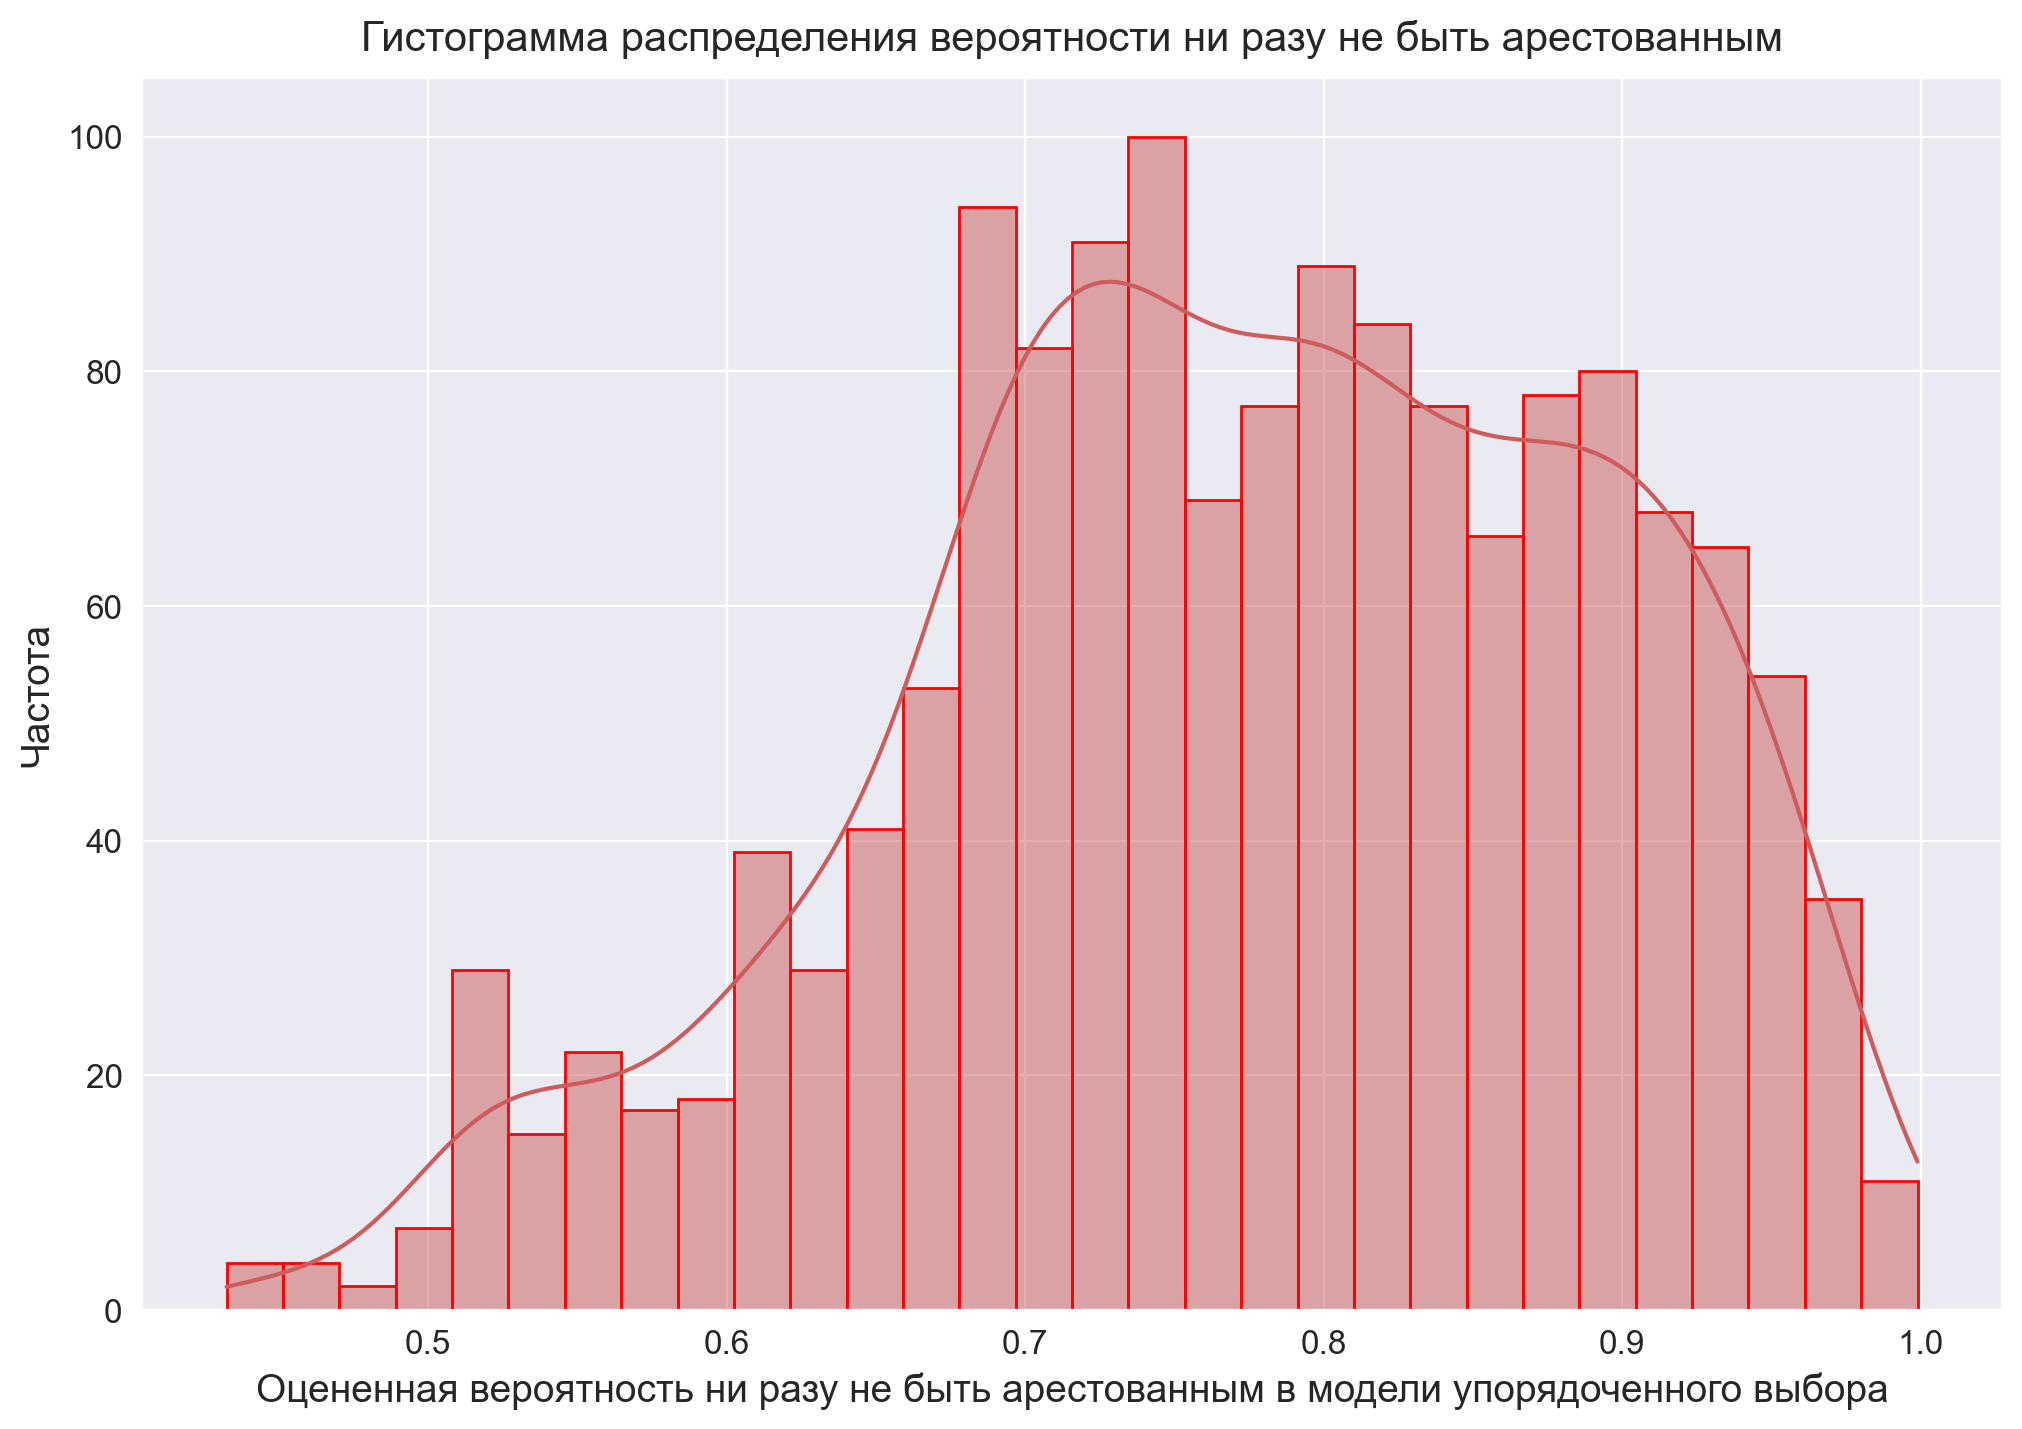

In [60]:
plt.figure(figsize=(12, 8))

sns.histplot(prob_arr[0], bins=30, kde=True, color='indianred', edgecolor='red')

plt.xlabel('Оцененная вероятность ни разу не быть арестованным в модели упорядоченного выбора', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма распределения вероятности ни разу не быть арестованным', fontsize=15, pad=10)

plt.show()

# h)

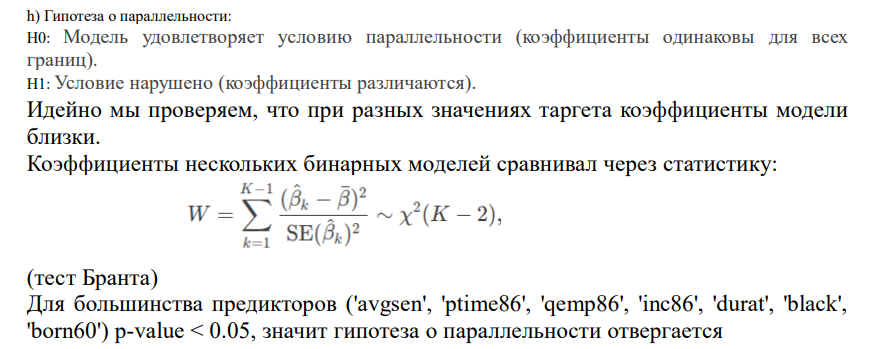

In [63]:
X_h = X.copy()
y_h = y_f
data_h = pd.concat([X_h, y_h], axis=1)

In [64]:
for k in range(1, 10):
    data_h[f'y_h_{k}'] = (y_h >= k).astype(int) #создаю бинарные переменные для границ

In [65]:
X_h

,const,pcnv,avgsen,ptime86,qemp86,inc86,durat,black,hispan,born60
0,1.0,1.0,0.0,0,0.0,0.0,4.0,1,0,1
1,1.0,0.5,0.0,0,4.0,103.7,0.0,0,1,1
2,1.0,1.0,0.0,0,4.0,148.2,0.0,0,0,1
3,1.0,1.0,0.0,0,0.0,0.0,3.0,0,0,1
4,1.0,0.5,0.0,0,4.0,183.4,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1495,1.0,0.0,0.0,0,0.0,0.0,3.0,0,0,0
1496,1.0,0.0,0.0,0,3.0,11.5,1.0,0,1,1
1497,1.0,0.0,0.0,0,1.0,1.9,1.0,0,0,0
1498,1.0,0.0,0.0,0,0.0,0.0,19.0,1,0,0


In [66]:
X_h.corr()

,const,pcnv,avgsen,ptime86,qemp86,inc86,durat,black,hispan,born60
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pcnv,NaN,1.000000,0.036771,0.064523,-0.003801,-0.027444,-0.006641,-0.063091,0.005821,0.011128
avgsen,NaN,0.036771,1.000000,0.103841,-0.089968,-0.068801,0.028583,0.144288,-0.024924,-0.047932
ptime86,NaN,0.064523,0.103841,1.000000,-0.256894,-0.156333,-0.010054,0.069616,0.052347,0.020555
qemp86,NaN,-0.003801,-0.089968,-0.256894,1.000000,0.711785,-0.496946,-0.180134,0.016352,0.012799
inc86,NaN,-0.027444,-0.068801,-0.156333,0.711785,1.000000,-0.353712,-0.158491,-0.013888,0.090051
durat,NaN,-0.006641,0.028583,-0.010054,-0.496946,-0.353712,1.000000,0.110814,-0.013535,0.008803
black,NaN,-0.063091,0.144288,0.069616,-0.180134,-0.158491,0.110814,1.000000,-0.221553,0.029372
hispan,NaN,0.005821,-0.024924,0.052347,0.016352,-0.013888,-0.013535,-0.221553,1.000000,-0.005785
born60,NaN,0.011128,-0.047932,0.020555,0.012799,0.090051,0.008803,0.029372,-0.005785,1.000000


In [67]:
models_h = []
for k in range(1, 10):
    model_h = sm.Logit(data_h[f'y_h_{k}'], X_h).fit(method='lbfgs')
    models_h.append(model_h) # обучаю отдельную бинарную модель для каждой границы

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q 

**стандартный метод bfgs выдавал ошибку на 4-10 моделях, видимо, из-за малого количества "1" в этих выборках. Поэтому я использовал lbfgs**

In [69]:
X_h.columns

Index(['const', 'pcnv', 'avgsen', 'ptime86', 'qemp86', 'inc86', 'durat',
       'black', 'hispan', 'born60'],
      dtype='object')

In [70]:
from scipy import stats

In [71]:
regressors_h = ['pcnv', 'avgsen', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']
for regressor in regressors_h:
    coefs_x = [model_h.params[regressor] for model_h in models_h]
    se_x = [model_h.bse[regressor] for model_h in models_h]


    chi2_stat = sum((np.array(coefs_x) - np.mean(coefs_x))**2 / np.array(se_x)**2)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df=len(coefs_x)-1)

    print(f"Chi² статистика для коэффициента при регрессоре {regressor}: {chi2_stat:.3f}, p-value: {p_value:.4f}")

Chi² статистика для коэффициента при регрессоре pcnv: 13.775, p-value: 0.0878
Chi² статистика для коэффициента при регрессоре avgsen: 6166.024, p-value: 0.0000
Chi² статистика для коэффициента при регрессоре ptime86: 18869.005, p-value: 0.0000
Chi² статистика для коэффициента при регрессоре qemp86: 5208.337, p-value: 0.0000
Chi² статистика для коэффициента при регрессоре inc86: 26035.652, p-value: 0.0000
Chi² статистика для коэффициента при регрессоре durat: 246797.286, p-value: 0.0000
Chi² статистика для коэффициента при регрессоре black: 4716.067, p-value: 0.0000
Chi² статистика для коэффициента при регрессоре hispan: 5.975, p-value: 0.6501
Chi² статистика для коэффициента при регрессоре born60: 284.727, p-value: 0.0000


**Для большинства предикторов ('avgsen', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'born60') p-value < 0.05, значит гипотеза о параллельности отвергается**

# i)

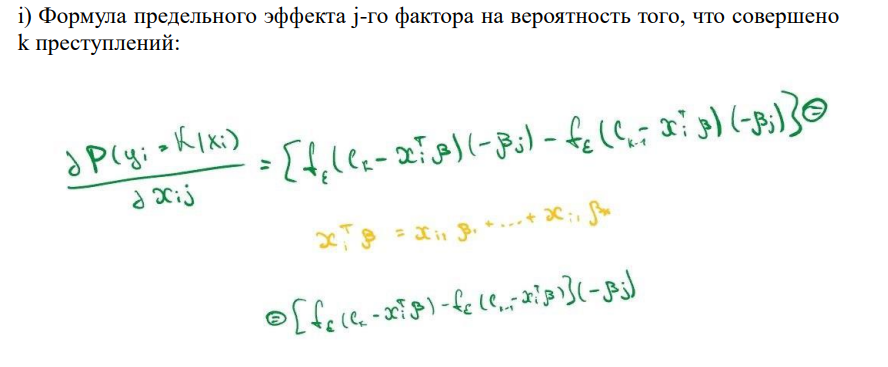

In [75]:
X_f.columns

Index(['pcnv', 'avgsen', 'ptime86', 'qemp86', 'inc86', 'durat', 'black',
       'hispan', 'born60'],
      dtype='object')

In [76]:
X_f['born60'].unique()

array([1, 0], dtype=int64)

# j)

In [78]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit

# Проверить версию statsmodels
print(f"Версия statsmodels: {sm.__version__}")

# Проверить, существует ли метод get_margeff в MNLogit
if hasattr(MNLogit, 'get_margeff'):
    print("Метод get_margeff() доступен в вашей версии")
else:
    print("Метод get_margeff() НЕ доступен - требуется обновление")

Версия statsmodels: 0.14.4
Метод get_margeff() НЕ доступен - требуется обновление


In [79]:
from statsmodels.discrete.discrete_model import MNLogit

In [80]:
X_j = X_f.copy()
X_j = sm.add_constant(X_j)

y_j = y_f

In [81]:
model_multinomial = MNLogit(y_j, X_j)
result_j = model_multinomial.fit(method='bfgs', maxiter=200)
print(result_j.summary())

C:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.654203
         Iterations: 200
         Function evaluations: 207
         Gradient evaluations: 207
                          MNLogit Regression Results                          
Dep. Variable:                 narr86   No. Observations:                 1500
Model:                        MNLogit   Df Residuals:                     1410
Method:                           MLE   Df Model:                           81
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                  0.1064
Time:                        23:39:20   Log-Likelihood:                -981.30
converged:                      False   LL-Null:                       -1098.2
Covariance Type:            nonrobust   LLR p-value:                 9.582e-17
  narr86=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3689      0.191     -7.149      0.000      -1.744      -

# k)

In [83]:
prob_k = result_j.predict(X_j)[0] # вероятности не быть арестованным ни разу для multinomial logit модели

In [84]:
prob_k

0       0.622635
1       0.852913
2       0.946900
3       0.815905
4       0.948381
          ...   
1495    0.703292
1496    0.616345
1497    0.700662
1498    0.429357
1499    0.933868
Name: 0, Length: 1500, dtype: float64

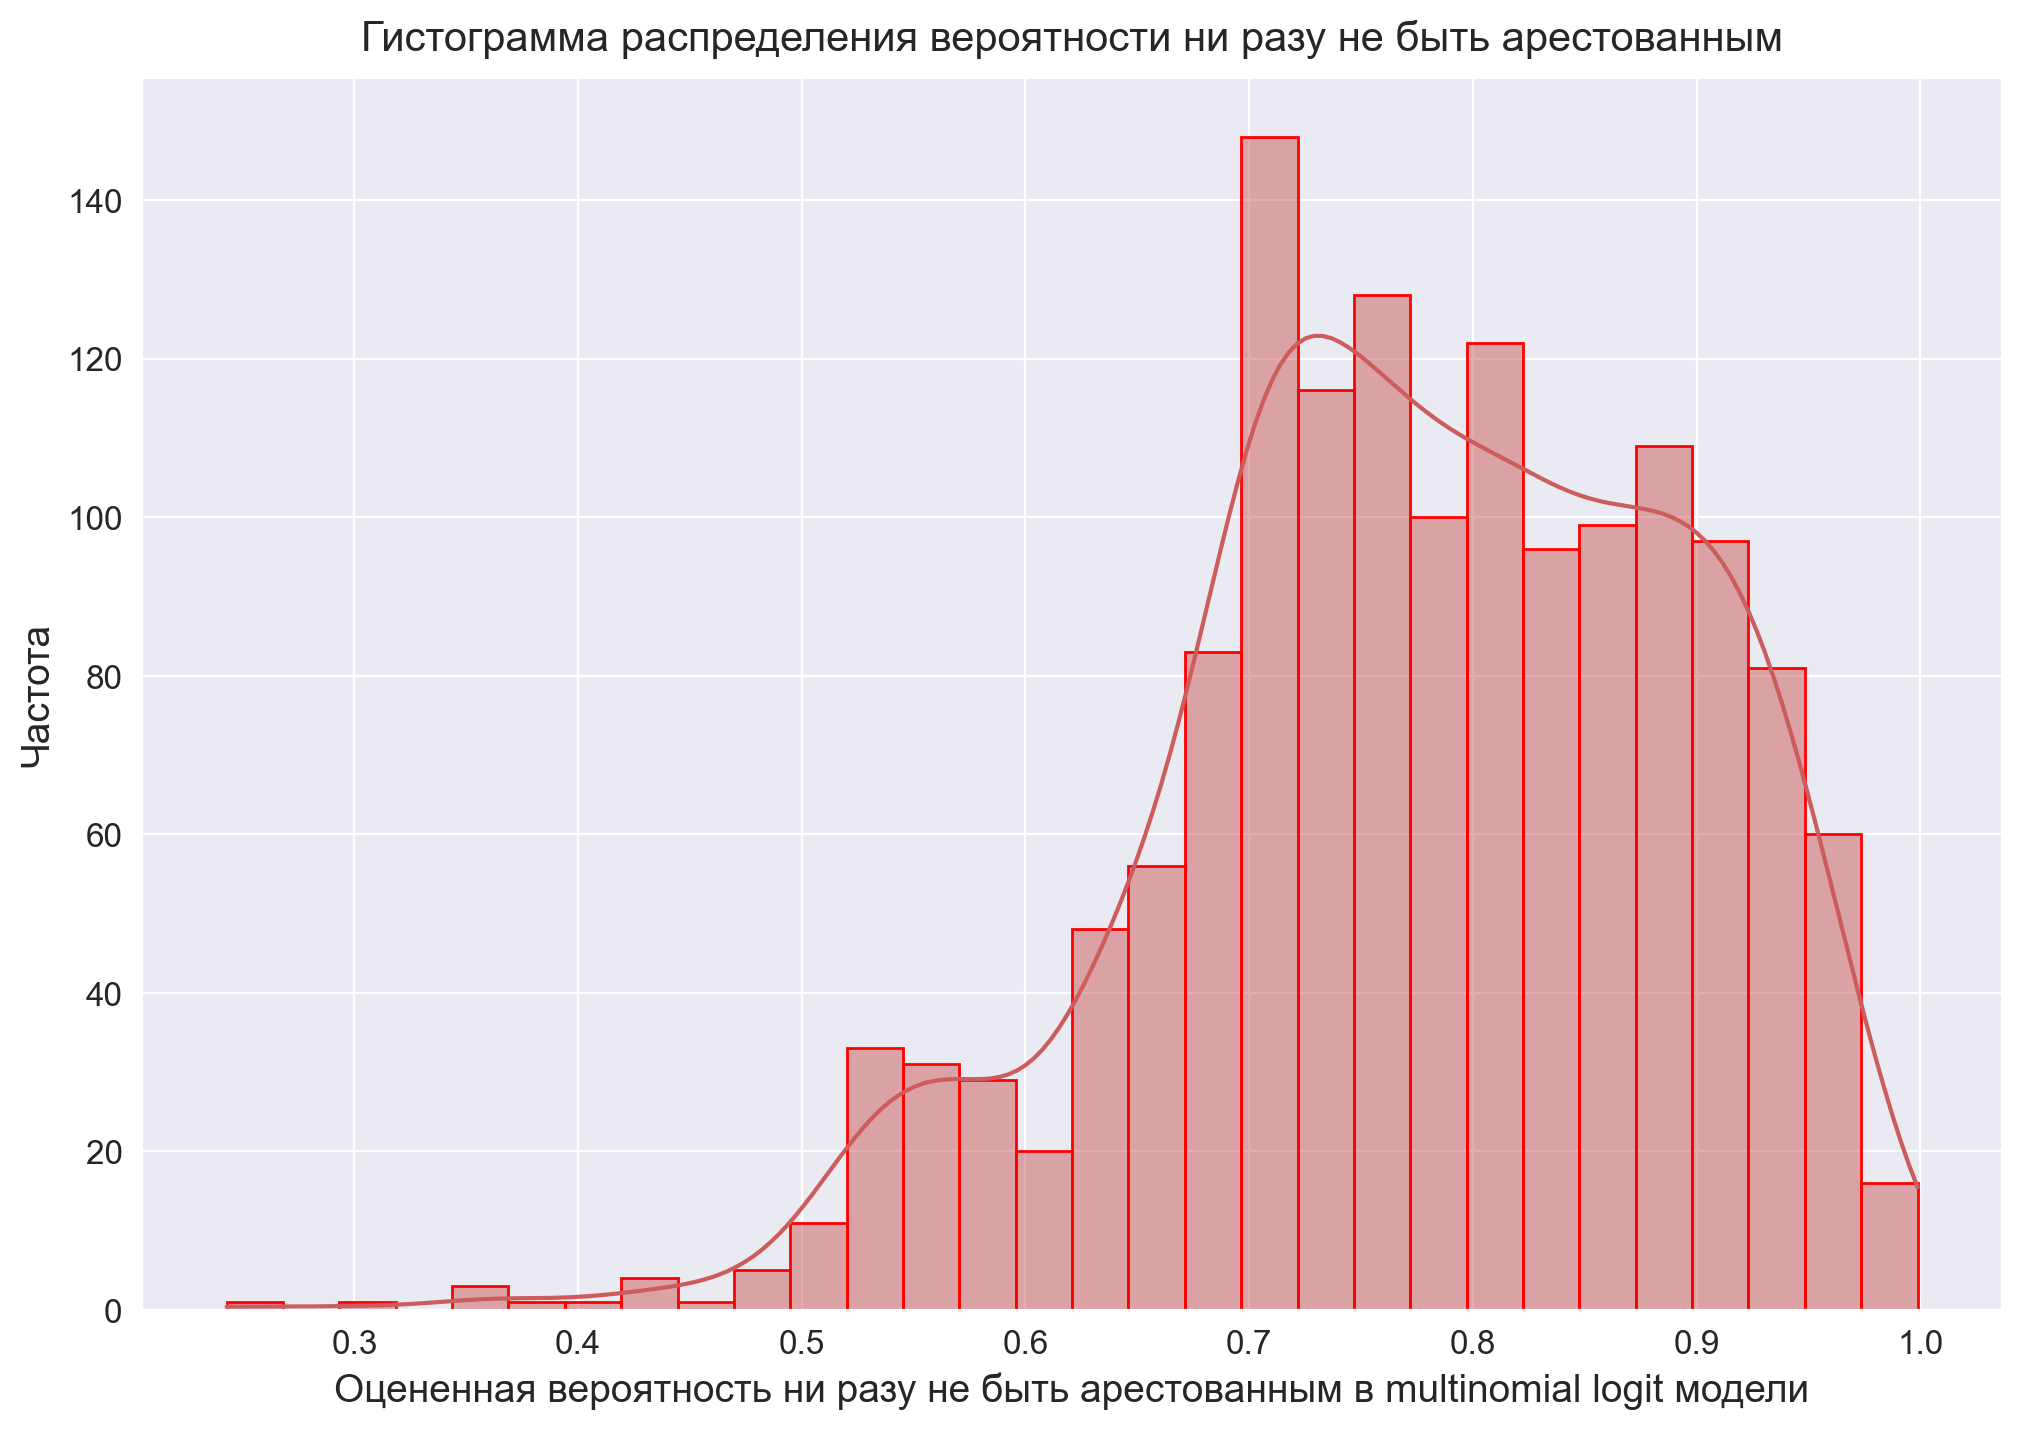

In [85]:
plt.figure(figsize=(12, 8))

sns.histplot(prob_k, bins=30, kde=True, color='indianred', edgecolor='red')

plt.xlabel('Оцененная вероятность ни разу не быть арестованным в multinomial logit модели', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.title('Гистограмма распределения вероятности ни разу не быть арестованным', fontsize=15, pad=10)

plt.show()

# l)

In [87]:
data_h['narr86'].value_counts()

narr86
0     1165
1      250
2       48
3       18
5        8
4        5
6        3
9        1
10       1
7        1
Name: count, dtype: int64

**Исходя из количества встречающихся для каждого количества арестов наблюдений, я решил объединить альтернативы в группы для исключения.\
Первая группа это наблюдения с 5 и более арестами. Вторая группа это наблюдения с 3 и более арестами.**

In [89]:
df.head()

,avgsen,black,born60,durat,hispan,inc86,inc86sq,narr86,nfarr86,nparr86,pcnv,pcnvsq,pt86sq,ptime86,qemp86,tottime,crime86
0,0.0,0,1,4.0,0,0.0,0.00,1,0,1,1.0,1.00,0,0,0.0,0.0,1
1,0.0,0,1,0.0,0,103.7,10753.69,1,1,0,0.5,0.25,0,0,4.0,0.0,1
2,0.0,0,1,0.0,0,148.2,21963.24,0,0,0,1.0,1.00,0,0,4.0,0.0,0
3,0.0,0,1,3.0,0,0.0,0.00,0,0,0,1.0,1.00,0,0,0.0,0.0,0
4,0.0,0,1,0.0,0,183.4,33635.56,0,0,0,0.5,0.25,0,0,4.0,0.0,0


In [90]:
df['narr86'].unique()

array([ 1,  0,  2,  9,  5,  3,  6, 10,  4,  7], dtype=int64)

In [91]:
# оцениваю restricted модель, исключая первую группу

In [92]:
df_restr1 = df[df['narr86'].isin([1,  0,  2,  3,  4])]

In [93]:
y_restr1 = df_restr1['narr86']
X_restr1 = df_restr1[['pcnv', 'avgsen', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']]
X_restr1 = sm.add_constant(X_restr1)

In [94]:
model_multinomial_restr1 = MNLogit(y_restr1, X_restr1)
result_restr1 = model_multinomial_restr1.fit(method='bfgs', maxiter=200)
print(result_restr1.summary())

         Current function value: 0.618504
         Iterations: 200
         Function evaluations: 208
         Gradient evaluations: 208
                          MNLogit Regression Results                          
Dep. Variable:                 narr86   No. Observations:                 1486
Model:                        MNLogit   Df Residuals:                     1446
Method:                           MLE   Df Model:                           36
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.08255
Time:                        23:39:21   Log-Likelihood:                -919.10
converged:                      False   LL-Null:                       -1001.8
Covariance Type:            nonrobust   LLR p-value:                 1.689e-18
  narr86=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3529      0.191     -7.083      0.000      -1.727      -

C:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [95]:
# сравниваю restricted и полную модель тестом Хаусмана

In [96]:

beta_full = result_j.params.iloc[:, :4].values
beta_restricted = result_restr1.params.values
beta_full_vec = beta_full.flatten()
beta_restricted_vec = beta_restricted.flatten()

In [97]:
beta_restricted.shape

(10, 4)

In [98]:
cov_full = result_j.cov_params().values
cov_restricted = result_restr1.cov_params().values

In [99]:
n_features = X_j.shape[1]  # Число регрессоров (включая константу)
cov_full_restricted = cov_full[:4*n_features, :4*n_features]

In [100]:
from scipy.stats import chi2

In [101]:
diff = beta_full_vec - beta_restricted_vec
cov_diff = cov_restricted - cov_full_restricted

In [102]:
try:
    cov_diff_inv = np.linalg.inv(cov_diff) #проверяю, что матрица не вырождена
except np.linalg.LinAlgError:
    cov_diff_inv = np.linalg.pinv(cov_diff) 

H = diff.T @ cov_diff_inv @ diff
k = len(diff)
p_value = 1 - chi2.cdf(H, k)

print(f"Статистика: {H}")
print(f"p-value: {p_value}")

Статистика: -1781398.9883574136
p-value: 1.0


**p-value < 0.05, значит с исключением альтернатив коэффициенты значимо изменились. В данном случае не выполняется независимость от посторонних альтернатив**

In [104]:
# оцениваю restricted модель, исключая вторую группу

In [105]:
df['narr86'].unique()

array([ 1,  0,  2,  9,  5,  3,  6, 10,  4,  7], dtype=int64)

In [106]:
df_restr2 = df[df['narr86'].isin([0, 1, 2])]

y_restr2 = df_restr2['narr86']
X_restr2 = df_restr2[['pcnv', 'avgsen', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']]
X_restr2 = sm.add_constant(X_restr2)

model_multinomial_restr2 = MNLogit(y_restr2, X_restr2)
result_restr2 = model_multinomial_restr2.fit(method='bfgs', maxiter=200)
print(result_restr2.summary())

Optimization terminated successfully.
         Current function value: 0.556370
         Iterations: 83
         Function evaluations: 88
         Gradient evaluations: 88
                          MNLogit Regression Results                          
Dep. Variable:                 narr86   No. Observations:                 1463
Model:                        MNLogit   Df Residuals:                     1443
Method:                           MLE   Df Model:                           18
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                 0.06555
Time:                        23:39:21   Log-Likelihood:                -813.97
converged:                       True   LL-Null:                       -871.06
Covariance Type:            nonrobust   LLR p-value:                 5.194e-16
  narr86=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3532      0.191     -

In [107]:
beta_full = result_j.params.iloc[:, :2].values
beta_restricted = result_restr2.params.values
beta_full_vec = beta_full.flatten()
beta_restricted_vec = beta_restricted.flatten()


cov_full = result_j.cov_params().values
cov_restricted = result_restr2.cov_params().values

n_features = X_j.shape[1]  # Число регрессоров (включая константу)
cov_full_restricted = cov_full[:2*n_features, :2*n_features]

In [108]:
diff = beta_full_vec - beta_restricted_vec
cov_diff = cov_restricted - cov_full_restricted

try:
    cov_diff_inv = np.linalg.inv(cov_diff) #проверяю, что матрица не вырождена
except np.linalg.LinAlgError:
    cov_diff_inv = np.linalg.pinv(cov_diff) 

H = diff.T @ cov_diff_inv @ diff
k = len(diff)
p_value = 1 - chi2.cdf(H, k)

print(f"Статистика: {H}")
print(f"p-value: {p_value}")

Статистика: 5026.290477076932
p-value: 0.0


**p-value < 0.05, значит с исключением альтернатив коэффициенты значимо изменились. В данном случае не выполняется независимость от посторонних альтернатив.**

**Таким образом, отношение вероятности быть арестованным 0 или малое количество раз (1-2) не зависит от того, что может быть больше 2 арестов. При этом при если рассмотреть группу 0-4 ареста, то другие альтернативы (4+ ареста) искажают влияют на соотношение вероятностей быть арестованным менее 4 раз.\
Это можно объяснить тем, что по логике, если человек был арестован 3 и более раз, то это серийный преступник, и, например, человек с 5 и 9 преступлениями за год не сильно отличается по характеристикам. При этом 0-2 престкпления за год могут быть совершены большим числом людей, объдиняя их в группу, на соотношения в которой вряд ли повлияет включение/исключение из нее серийных преступников.**

# o)

In [112]:
# Logit модель
prob_1 = logit_a_fit.predict(X) # вероятность быть хотя бы раз арестованным
prob_0_L = 1 - prob_1 # вероятность ни разу не быть арестованным

# Ordered Logit
prob_0_OL = result_f.predict(X_f)[0] # вероятности быть арестованным для каждого количества раз

# Multinomial Logit
prob_0_ML = result_j.predict(X_j)[0]

**Посмотрим на распределения вероятностей, оцененных 3мя моделями, вместе**

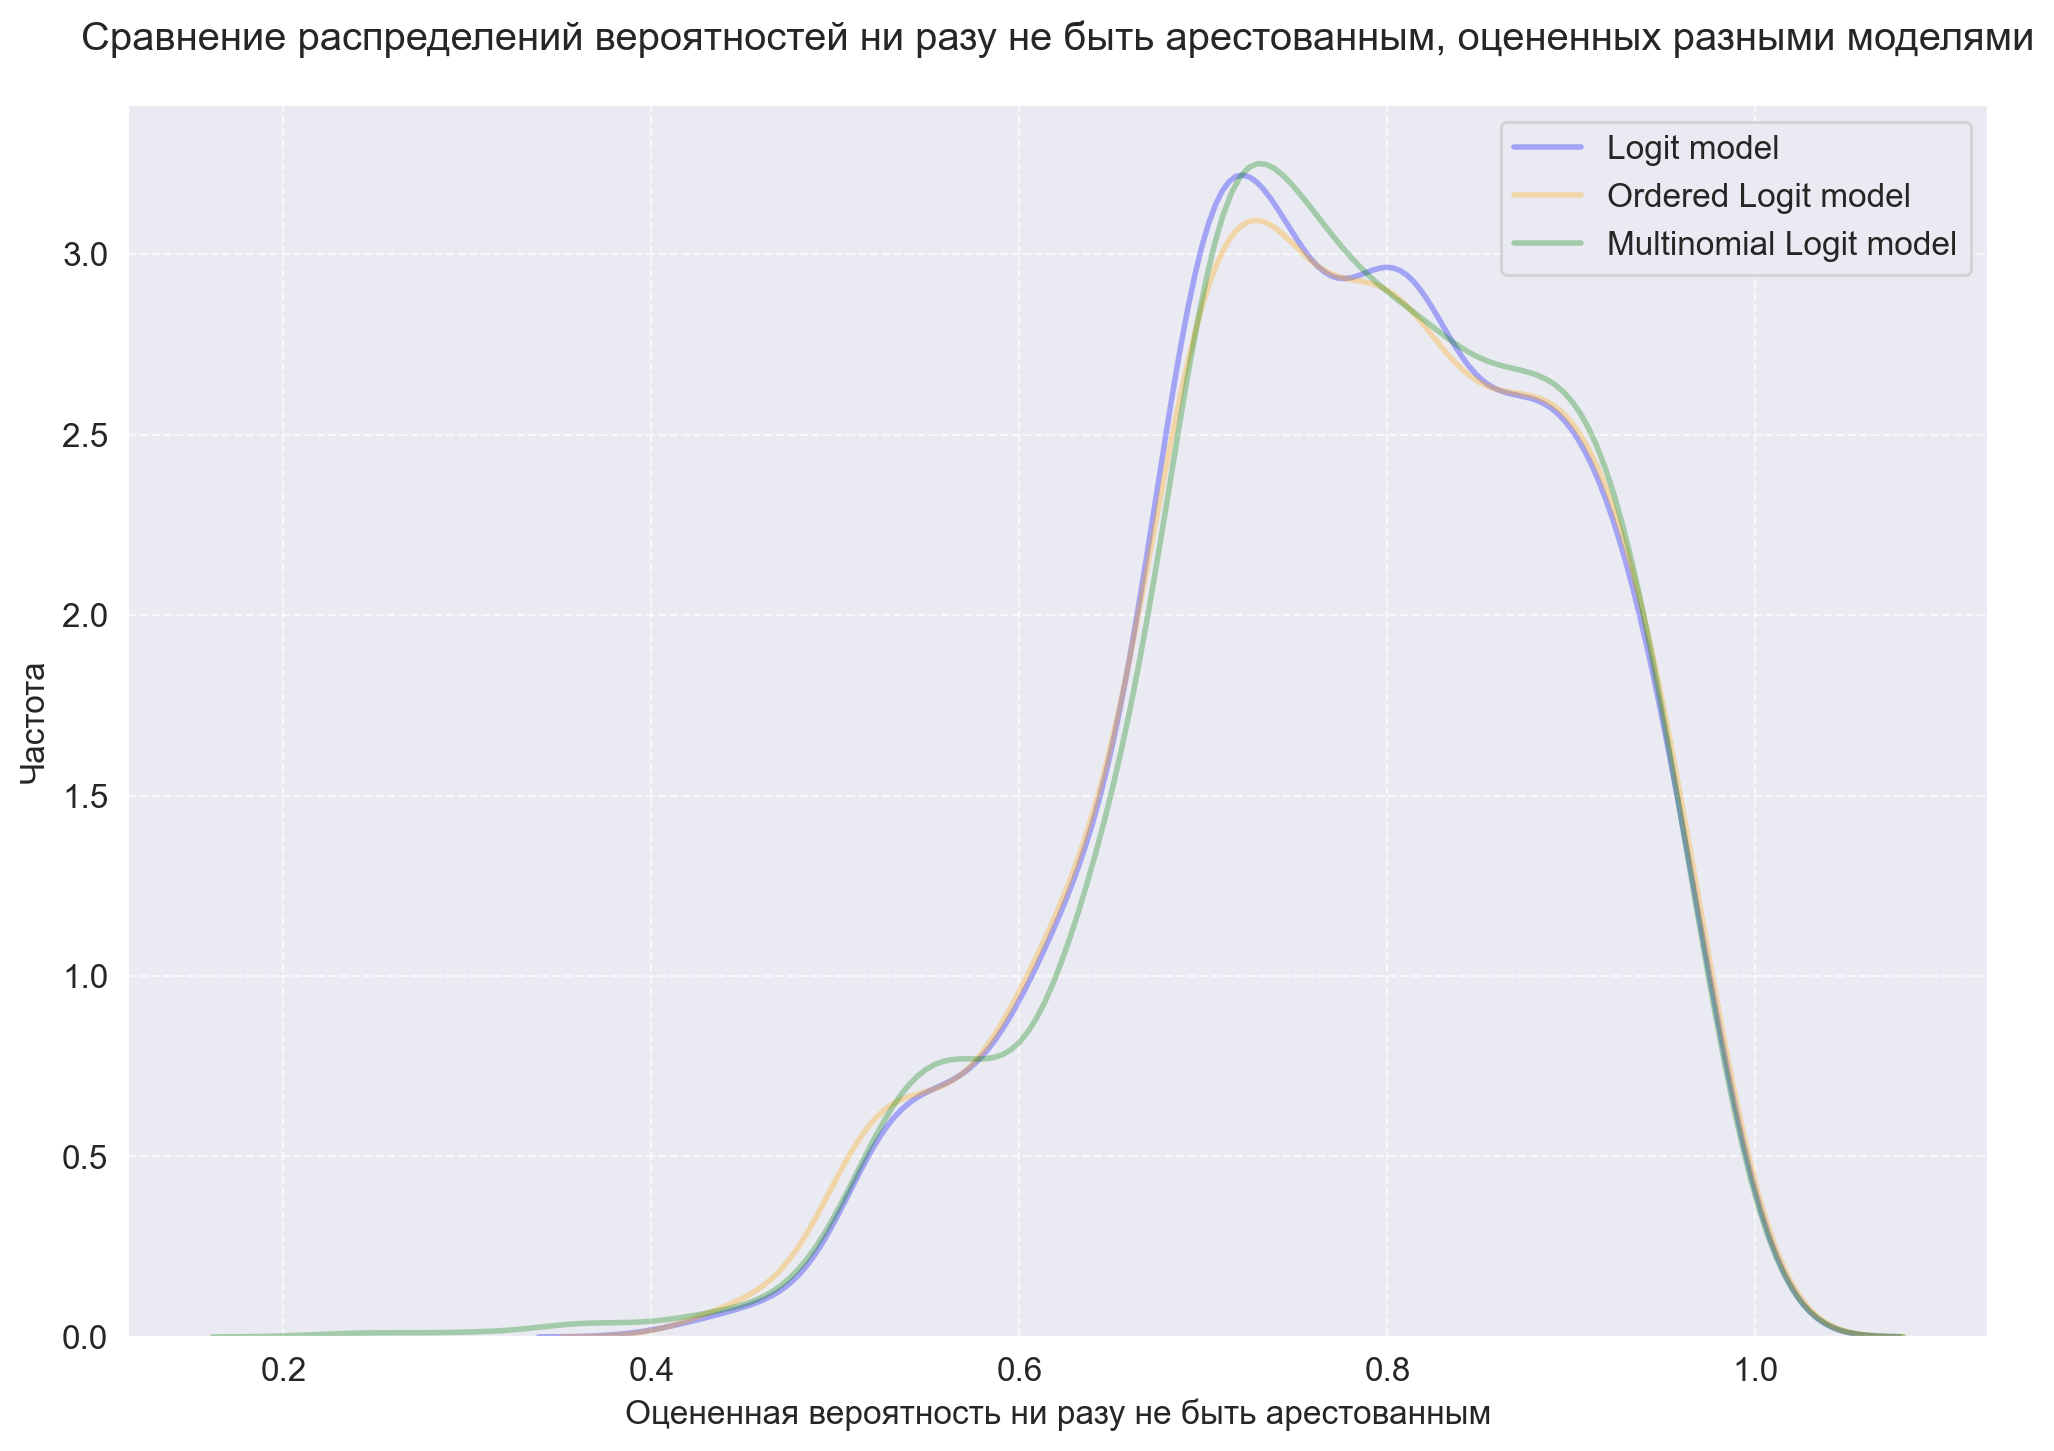

In [114]:
plt.figure(figsize=(12, 8), dpi=100)
sns.kdeplot(
    data=prob_0_L,
    color="blue",
    label="Logit model",
    linewidth=2,
    fill=False,  
    alpha=0.3,  
)

sns.kdeplot(
    data=prob_0_OL,
    color="orange",
    label="Ordered Logit model",
    linewidth=2,
    fill=False,
    alpha=0.3,
)

sns.kdeplot(
    data=prob_0_ML,
    color="green",
    label="Multinomial Logit model",
    linewidth=2,
    fill=False,
    alpha=0.3,
)


plt.title("Сравнение распределений вероятностей ни разу не быть арестованным, оцененных разными моделями", pad=20)
plt.xlabel("Оцененная вероятность ни разу не быть арестованным")
plt.ylabel("Частота")
plt.legend(loc="upper right")  
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

Заметим, что **распределение оцененных вероятностей у разных моделей почти идентичное**\
Скорее всего, и **точность предсказаний будет примерно одинаковой**

In [133]:
y_bin = (y_f >= 1).astype(int)

Для сравнения я выбрал самые популярные метрики качества классификации - **F1 и ROC-AUC**.

In [148]:
from sklearn.metrics import f1_score, roc_auc_score

# Ваши массивы с вероятностями
# prob_binary, prob_ordered, prob_multinomial
# y_test_binary - бинарная целевая переменная

# Простое сравнение метрик
model_names = ['Binary Logit', 'Ordered Logit', 'Multinomial Logit']
prob_arrays = [prob_0_L, prob_0_OL, prob_0_ML]

results = []
for probs, name in zip(prob_arrays, model_names):
    # Бинарные предсказания (порог 0.5)
    y_pred = (probs >= 0.5).astype(int)
    
    # Вычисляем метрики
    f1 = f1_score(y_bin, y_pred)
    roc_auc = roc_auc_score(y_bin, probs)
    
    results.append({
        'Model': name,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

# Создаем таблицу результатов
results_df = pd.DataFrame(results)
results_df = results_df.round(4)
print("Сравнение моделей:")
display(results_df.style
        .background_gradient(subset=['F1-Score', 'ROC-AUC'], cmap='RdYlGn_r'))

Сравнение моделей:


,Model,F1-Score,ROC-AUC
0,Binary Logit,0.359600,0.305100
1,Ordered Logit,0.359800,0.305100
2,Multinomial Logit,0.356600,0.302200


**Множественный Logit оказался лучшей моделью, но разница очень мала**